# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Molecular Dynamics - NVE

The objective of this exercises is to test and improve the given Molecular Dynamics (MD) code to study the thermodynamic behaviour of a system of particles.

The MD code runs a simulation in the microcanical ensemble (costant number of particles $N$, volume $V$ and energy $E$) of the motion of $N$ interacting particles in a box with volume $V$, using the Verlet algorithm. The interaction between particles is described by the Lennard-Jones potential. During the simulation, the code evaluates the thermodynamic properties of the system.

**Verlet algorithm**

As initial spatial configuration of the simulation we take the *fcc lattice*.

At each steps, the algorithm evalutes the time evolution of the configuration as:
$$ \vec{r}(t + dt) = 2\vec{r}(t) - \vec{r}(t - dt) + dt^2 \vec{a}$$
where $ \vec{a} = \frac{\vec{F}}{m} = -\frac{\vec{\nabla}V}{m}$ and $V$ is the Lennard-Jones potential.


**Thermodynamic properties**

The observables of the systems computed with the MD code are the following:

- *Potential energy*: the Lennard-Jones potential between each couple of particles is:

    $$V_{ij}=4\epsilon\left[\left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12}-\left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{6}\right]$$

    As almost only the neighbour particles contribute to the potential, we neglet all the interactions beyond a cut-off radius $r_c$ to reduce the amount of calculations.
    

- *Kinetic energy*: for each particle $K_i=\frac{1}{2}m(v_x^2+v_y^2+v_z^2)$, where velocities are evaluated with consecutive positions obtained with the Verlet algorithm;


- *Total energy*: $E=V+K$;


- *Temperature*: it is computed from the kinetic energy thanks to the energy equipartion principle: $T = \frac{2K}{3N}$;


- *Pressure*: it is evaluated thanks to the virial theorem:

    $$ P = \rho k_B T + \frac{\left\langle W \right\rangle}{3V}$$

    where:$$ W =  \sum_{i=1}^{N-1} \sum_{j>i}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] $$

It is convenient to work with a dimensionless problem, and so to express quantities in Lennard-Jones units; the mass is considered as unity and the relations of the properties expressed in LJ units with the ones in SI units are the following:

$$ V= \epsilon V^* \qquad E= \epsilon E^* \qquad K= \epsilon K^* \qquad T = \frac{\epsilon}{k_B}T^* \qquad P = \frac{\epsilon}{\sigma^3} P^*$$

Moreover, working in LJ units makes all the quantities of order 1.


**Periodic Boundary Conditions**

To reduce the spacial extension of the problem, that would be infinite, we consider a sample of the system contained in a finite 3D box and we apply Periodic Boundary Conditions (PBC). The box must contain a statistically significant number of particles whithout beeing too large and it is replicated infinitely in all spatial directions so that the whole system is approximated by a periodic system of equal boxes. In the course of the simulation, as a molecule moves in a box, its periodic image in each of the neighbour boxes moves in the same way; thus, as a molecule leaves the box, one of its images will enter through the opposite face of the box and the box density remains constant.

### Exercise 04.1

As a first step, we improve the MD code by enabling the possibility to re-start the simulation from a final spatial configuration obtained in a previous simulation. Together with this, we also add the possibility to rescale velocities in order to match a desired temperature. In fact, as it is also shown below, this is of central importance to equilibrate the system. As the starting configuration *fcc lattice* is perfectly ordered and the velocities are drawn from a uniform distribution, at each step the particles assume more disordered configurations and velocities tend to assume a Maxwell distribution and this makes the temperature drop to lower values than the target one. By progressively restarting the simulation from an intermediate configuration and rescaling velocities by a factor $ f_s= \sqrt{T_{target}/T_{actual}}=\sqrt{3 \ T_{target}/ \sum v^2}$ we force the system to "live" at the target temperature. 

This is obtained with the following operations:


- the code, at the end of a simulation, prints out the two last spatial configurations.


- The bool variable *restart* is added to the input parameters of the simulation: if it is set to 1, the code reads the last two spatial configurations of the previous simulation to re-start from them and rescales velocities, while if it is 0 the simulation is started from an initial *fcc lattice* configuration and velocities are extracted randomly.


- The code re-starts the simulation (*restart*=1) calculating a new configuration $\vec{r}(t+ dt)$ from the two input ones (outputs of the previous simulation) with the Verlet algorithm; from $\vec{r}(t + dt)$ and $\vec{r}(t)$ computes $\vec{v}(t+  dt/2)$ and from that $T_{actual}=T(t+ dt/2)$. Comparing this actual temperature with the target one, it calculates the factor $f_s$ that is used to rescale the velocities to take the system to the target temperature of the simulation; with the rescaled velocities the code computes the right configuration to start the simulation from.

**Equilibration**

Before running the real simulation, it is necessary to equilibrate the system: starting from a given configuration (*fcc lattice* in this case), the code is run for a certain number of times (re-starting from previous spatial configurations and rescaling velocities) until the system's thermodinamic properties reach approximately stable values; then it is possible to obtain reasonable measurements of them.

**Note**: the READ.me file contains the detailed instructions to equilibrate the system.

Here are some graphs that show the behaviour of the thermodynamic properties of the system during the equilibration phase.

The system, with $N_{part}=108$, is simulated in its solid phase:
- $T^*= 0.8$
- $\rho^*= 1.1 $
- $r_c=2.2$

The simulation is repeated $7$ times with the following parameters:
- $\delta t=0.0005$
- $N_{steps}=1000$

Thermodynamic properties are measured every $10$ steps, in order to reduce correlation between their values.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
yp_m = np.loadtxt("equilibration/instant_epot.out", skiprows=300)
ye_m = np.loadtxt("equilibration/instant_etot.out", skiprows=300)

p = np.mean(yp_m)
e = np.mean(ye_m)

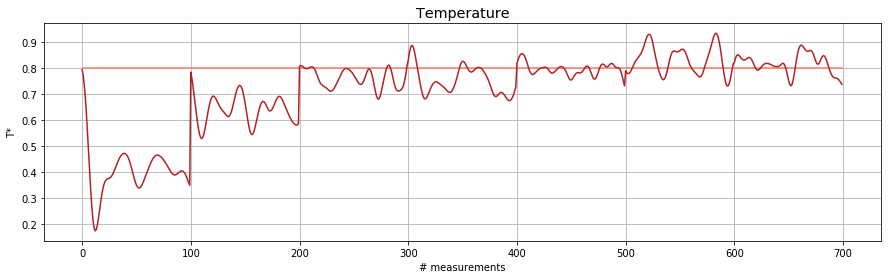

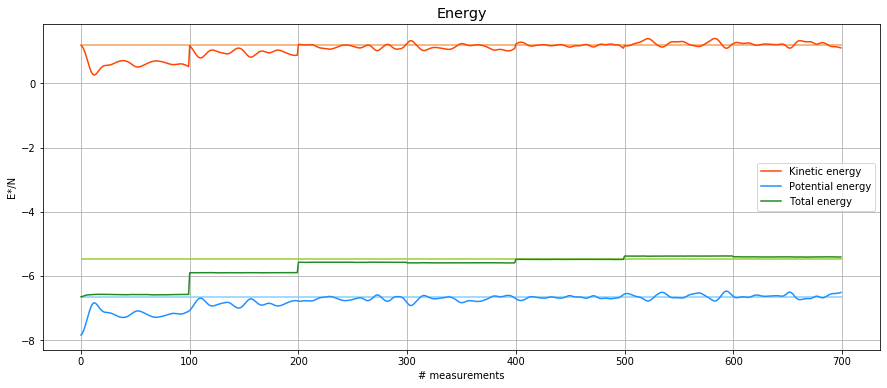

In [9]:
yt = np.loadtxt("equilibration/instant_temp.out")
yk = np.loadtxt("equilibration/instant_ekin.out")
yp = np.loadtxt("equilibration/instant_epot.out")
ye = np.loadtxt("equilibration/instant_etot.out")

fig=plt.figure(figsize=(15, 4))

plt.plot(yt, color='firebrick')
plt.title("Temperature", size='x-large')
plt.hlines(0.8, 0, 700, color='salmon')
plt.xlabel('# measurements')
plt.ylabel('T*')
plt.grid(True) 

fig=plt.figure(figsize=(15, 6))

plt.plot(yk, color='orangered', label='Kinetic energy')
plt.plot(yp, color='dodgerblue', label='Potential energy')
plt.plot(ye, color='forestgreen', label='Total energy')
plt.hlines(1.2, 0, 700, color='sandybrown')
plt.hlines(p, 0, 700, color='lightskyblue')
plt.hlines(e, 0, 700, color='yellowgreen')
plt.title("Energy", size='x-large')
plt.xlabel('# measurements')
plt.ylabel('E*/N')
plt.legend()
plt.grid(True)
plt.plot()

plt.show()

We can see that after $\sim500$ measurements (and so after $5$ consequent simulations) the thermodynamic propeties are already stable around the target value.

We can also notice that they are all of order 1, which is reasonable since the quantities are expressed in LJ units.

Temperature and kinetic energy show the same behaviour because they are proportional. It is evident in the graphs the characteristic initial dropping: it is due to the fact that the simulations start from a configuration (especially the first one, *fcc*) that is more ordered compared to the one we want to simulate, so the potential energy immediately grows and consequently (total energy conservation) the kinetic energy drops. This happens at the beginning of each simulation until the system is equilibrated and its temperature reaches the target temperature.

Potential energy has the opposite behaviour, since the algorithm tends to conserve total energy (as expected in the microcanonical ensemble). The latter fluctuates on a shorter scale compared to the other energies and increases at each simulation until the system is equilibrated.

###  Exercise 04.2
    
The MD code provided prints out only the instantaneous values for the thermodinamic properties. We improve it adding the evaluation of the mean values and their uncertainties with the data blocking method, in order to show their global tendency while increasing the simulation steps.

We divide the $N_{steps}$ of the simulation into $N_{blocks}$; for each of them we calculate the mean value and its uncertainty for every thermodynamic property. As the values are very correlated, also within each block the thermodynamic properties are evaluated every $10$ steps.

Here are shown graphs of the instantaneous and mean values of the thermodynamic properties for the system in its solid phase after it has been equilibrated (with 9 consequent simulations). 

**Note**: from now on all graphs will show the thermodynamic properties of the already equilibrated system (after 9 equilibration simulations of $N_{steps}=1000$).

The simulation's parameters are:
- $N_{steps}=10000$
- $N_{blocks}=50$

In [10]:
titles=['Temperature','Kinetic energy','Potential energy','Total energy','Pressure']
obs=['temp','ekin','epot','etot','press']

labels_LJ=['T*','K*/N','U*/N','E*/N','P*']
labels=['T (K)','K/N (J)','U/N (J)','E/N (J)','P (Pa)']

colors=['firebrick','orangered','dodgerblue','forestgreen','darkblue']

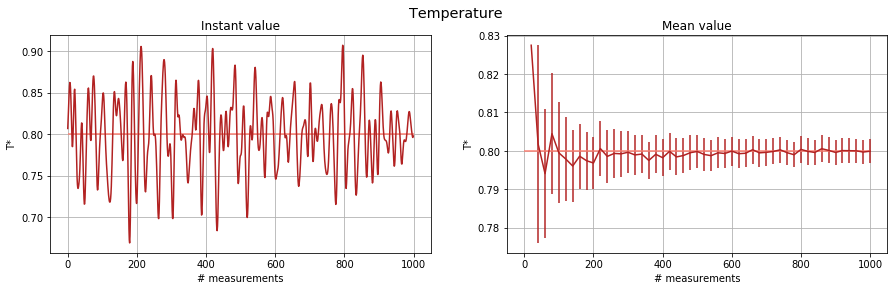

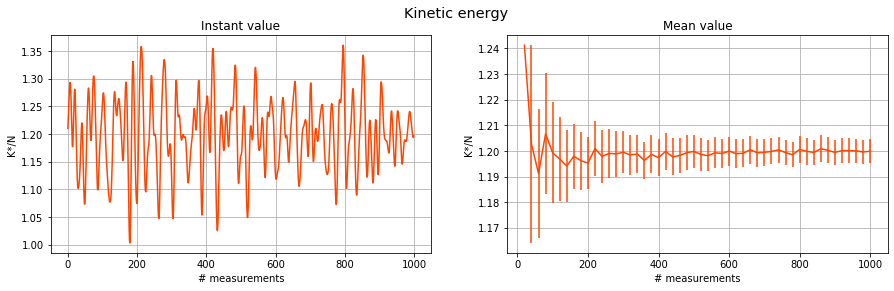

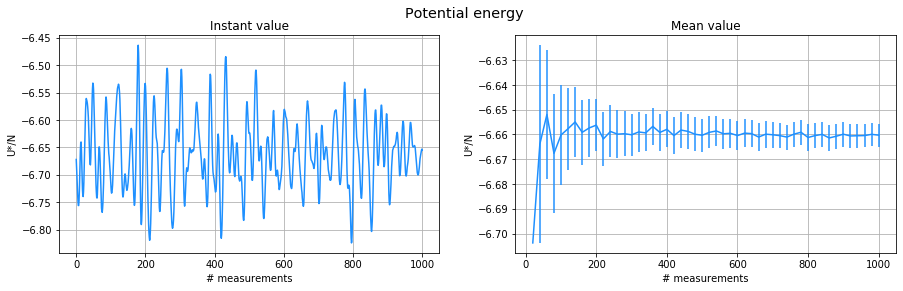

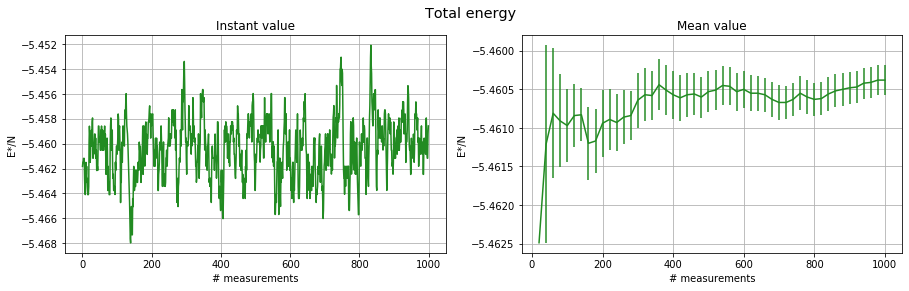

In [11]:
for i in range (4):
    
    fig=plt.figure(figsize=(15, 4))
    plt.suptitle(titles[i],size='x-large')

    plt.subplot(121)
    y = np.loadtxt("results/instant_"+obs[i]+".out")
    plt.plot(y, color=colors[i])
    if(i==0): plt.hlines(0.8, 0, 1000, color='salmon')
    plt.xlabel('# measurements')
    plt.ylabel(labels_LJ[i])
    plt.title('Instant value')
    plt.grid(True)
    
    plt.subplot(122)
    x,y,yerr = np.loadtxt("results/ave_"+obs[i]+".out", usecols=(0,1,2), unpack=True)
    plt.errorbar(x, y ,yerr, color=colors[i])
    if(i==0): plt.hlines(0.8, 0, 1000, color='salmon')
    plt.xlabel('# measurements')
    plt.ylabel(labels_LJ[i])
    plt.title('Mean value')
    plt.grid(True) 
        
plt.show()

The mean values of the thermodynamic properties are stable around certain values, especially because we simulated the solid phase, for which the particles have little freedom of motion and the configurations do not vary much. We can note that the temperature has mean values matching the target temperature $T=0.8$.

###  Exercise 04.3

We now want to perform MD simulations via a Lennard-Jones model of Argon, with the following parameters:
- $\sigma = 0.34$ nm
- $\epsilon/k_B = 120$ K
- $m=39.948$ amu 

in the three phases:
- solid: $\rho^\star = 1.1$, $T^\star = 0.8$ ($r_c = 2.2$)
- liquid: $\rho^\star = 0.8$, $T^\star = 1.1$ ($r_c = 2.5$)
- gas: $\rho^\star = 0.05$, $T^\star = 1.2$ ($r_c = 5.0$)

All thermodynamic quantities are rescaled with the relations mentioned before in the implemented code, so that the results are expressed in SI units.

Pictures of the obtained average values and uncertainties for the thermodynamic properties are shown below.

In [12]:
kB = 1.380649 * 10**-23
epsilon_kB = 120    
epsilon = epsilon_kB * kB

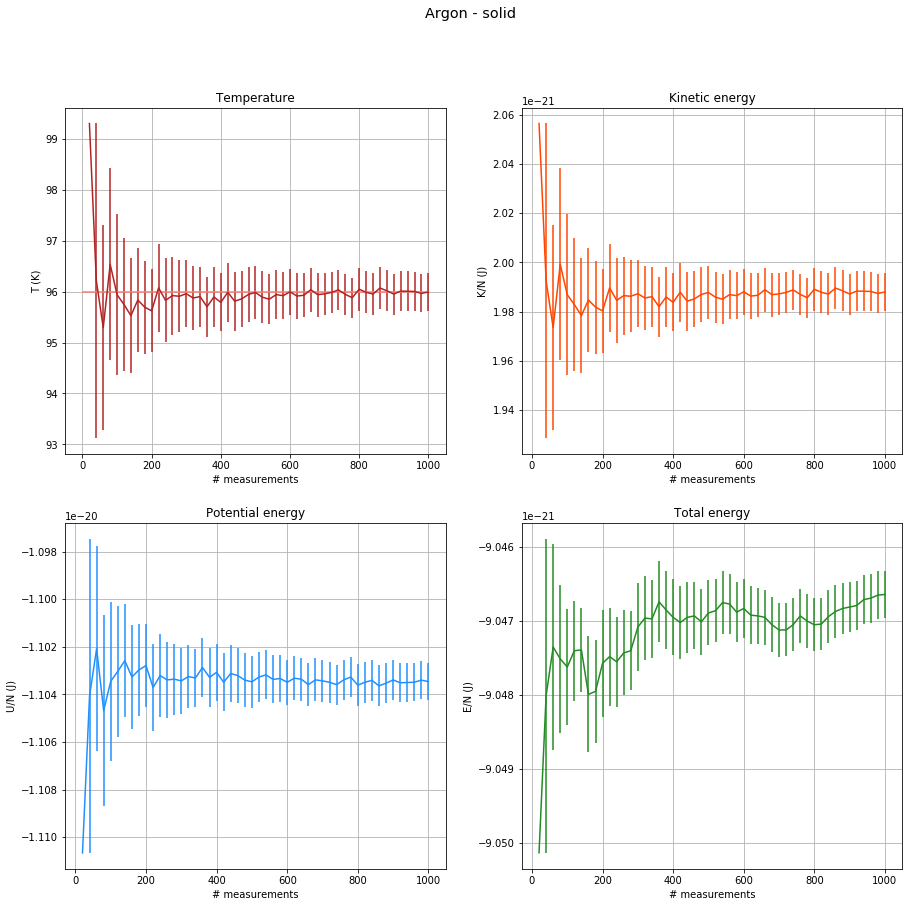

In [13]:
fig=plt.figure(figsize=(15, 14))
plt.suptitle("Argon - solid", size='x-large')
p=221

for i in range (4):
    
    plt.subplot(p)
    x,y,yerr = np.loadtxt("Argon/solid/ave_"+obs[i]+".out", usecols=(0,1,2), unpack=True)
    plt.errorbar(x, y ,yerr, color=colors[i])
    if(i==0): plt.hlines(0.8*epsilon_kB, 0, 1000, color='salmon')
    plt.xlabel('# measurements')
    plt.ylabel(labels[i])
    plt.title(titles[i])
    plt.grid(True)
    p+=1
        
plt.show()

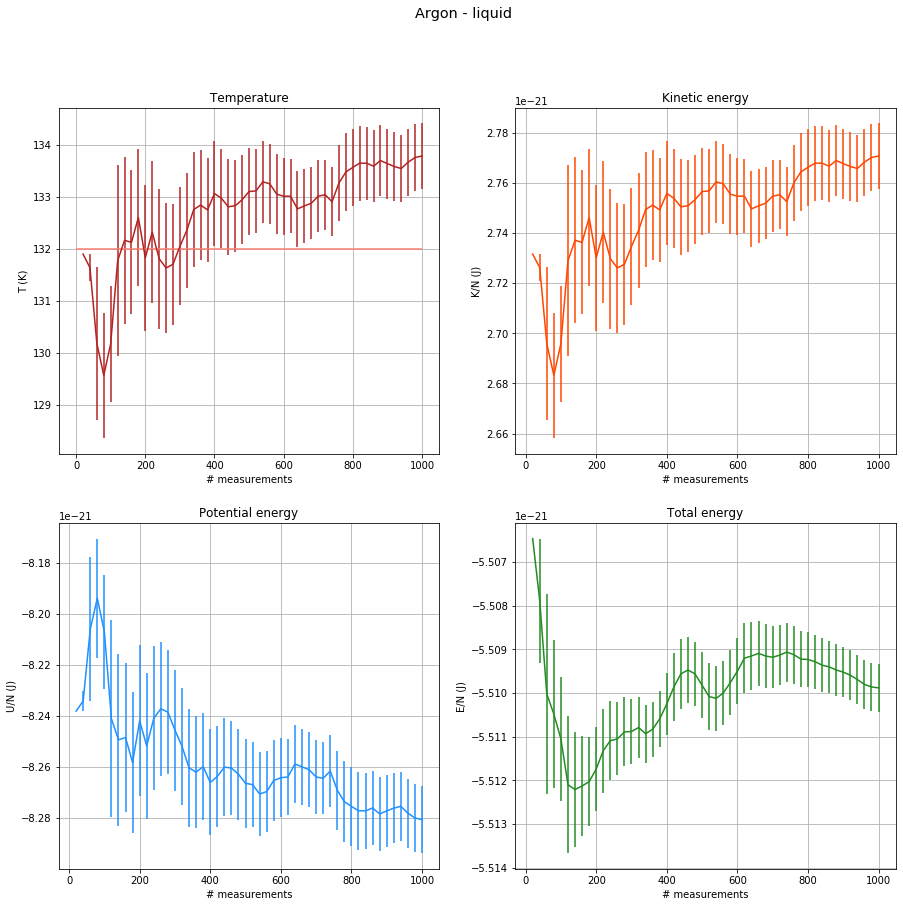

In [14]:
fig=plt.figure(figsize=(15, 14))
plt.suptitle("Argon - liquid", size='x-large')
p=221

for i in range (4):
    
    plt.subplot(p)
    x,y,yerr = np.loadtxt("Argon/liquid/ave_"+obs[i]+".out", usecols=(0,1,2), unpack=True)
    plt.errorbar(x, y ,yerr, color=colors[i])
    if(i==0): plt.hlines(1.1*epsilon_kB, 0, 1000, color='salmon')
    plt.xlabel('# measurements')
    plt.ylabel(labels[i])
    plt.title(titles[i])
    plt.grid(True)
    p+=1
        
plt.show()

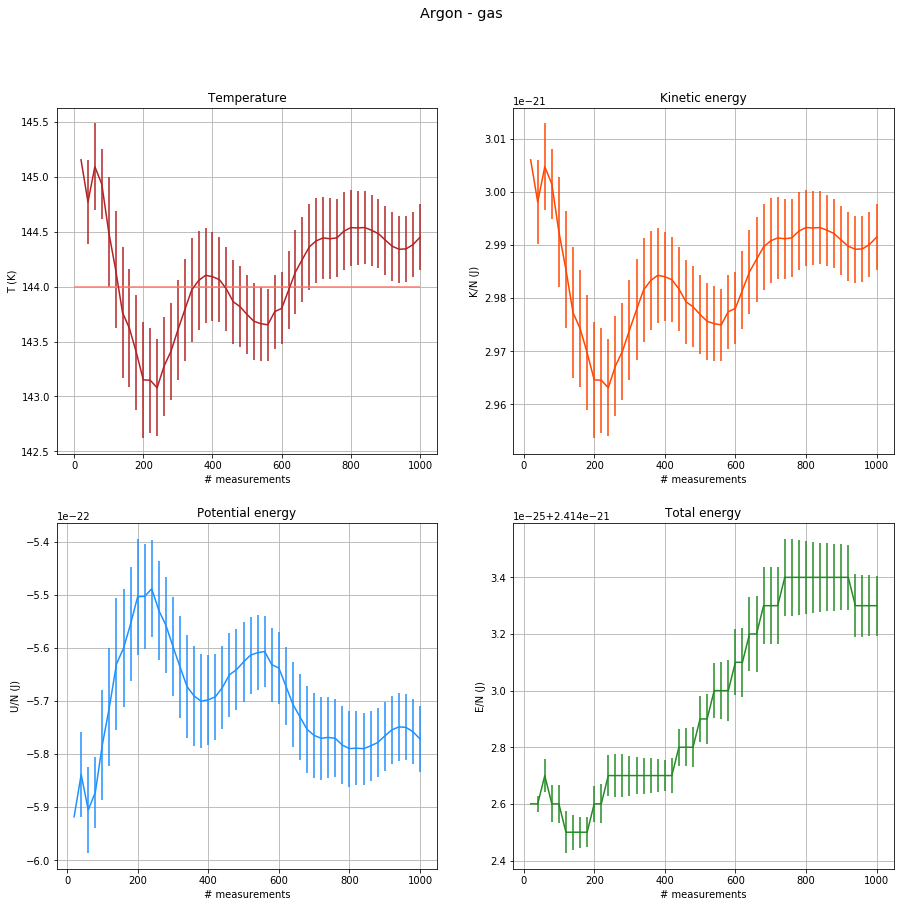

In [15]:
fig=plt.figure(figsize=(15, 14))
plt.suptitle("Argon - gas", size='x-large')
p=221

for i in range (4):
    
    plt.subplot(p)
    x,y,yerr = np.loadtxt("Argon/gas/ave_"+obs[i]+".out", usecols=(0,1,2), unpack=True)
    plt.errorbar(x, y ,yerr, color=colors[i])
    if(i==0): plt.hlines(1.2*epsilon_kB, 0, 1000, color='salmon')
    plt.xlabel('# measurements')
    plt.ylabel(labels[i])
    plt.title(titles[i])
    plt.grid(True)
    p+=1
        
plt.show()

From the pictures we can distinguish different behaviours of the thermodynamic properties in relation to the system phase:

- the solid phase has stable trends;
- the liquid phase has more irregular values;
- the gas phase has very oscillating values;

This is due to the different internal particles configurations and freedom of motion of each phase. For this reason, the gas phase is the most difficult to simulate as it properties have an irregular behaviour around the target values.

###  Optional exercise

We include the calculation of the pressure $P$ inside the MD code.

The graphs show the instantaneous and mean values of pressure for an equilibrated system in its solid phase.

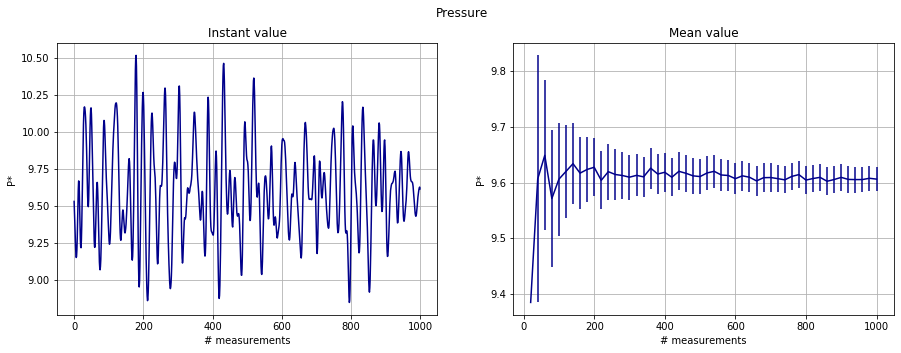

In [16]:
x1,y1,yerr1 = np.loadtxt("results/ave_press.out", usecols=(0,1,2),unpack=True)
yt = np.loadtxt("results/instant_press.out")


fig=plt.figure(figsize=(15, 5))
plt.suptitle("Pressure", size='large')

plt.subplot(121)
plt.plot(yt, color='darkblue')
plt.title('Instant value')
plt.xlabel('# measurements')
plt.ylabel('P*')
plt.grid(True) 

plt.subplot(122)
plt.errorbar(x1, y1 ,yerr1, color='darkblue')
plt.title('Mean value')
plt.xlabel('# measurements')
plt.ylabel('P*')
plt.grid(True) 

plt.show()

As obtained with the others properties, the pressure values stabilizes and it is of order 1, so we can consider it a reasonable result too.

We also implement the pressure calculation to apply it to the real case of Argon.

Here are shown the results for the Argon simulation in the three phases.

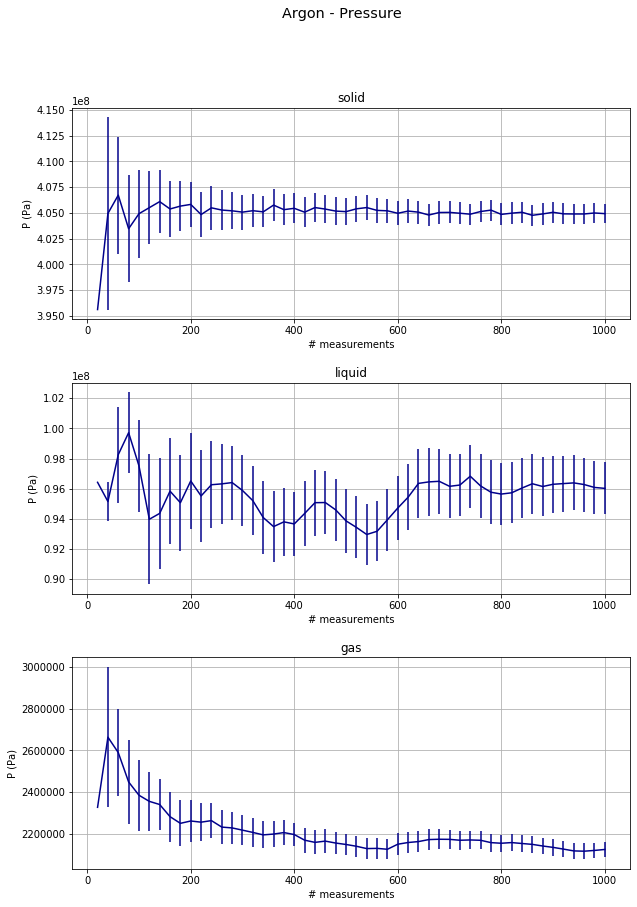

In [17]:
x1,y1,yerr1 = np.loadtxt("Argon/solid/ave_press.out", usecols=(0,1,2),unpack=True)
x2,y2,yerr2 = np.loadtxt("Argon/liquid/ave_press.out", usecols=(0,1,2),unpack=True)
x3,y3,yerr3 = np.loadtxt("Argon/gas/ave_press.out", usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 14))
plt.suptitle("Argon - Pressure", size='x-large')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(311)
plt.errorbar(x1, y1 ,yerr1, color='darkblue')
plt.title('solid')
plt.xlabel('# measurements')
plt.ylabel('P (Pa)')
plt.grid(True) 

plt.subplot(312)
plt.errorbar(x2, y2 ,yerr2, color='darkblue')
plt.title('liquid')
plt.xlabel('# measurements')
plt.ylabel('P (Pa)')
plt.grid(True) 

plt.subplot(313)
plt.errorbar(x3, y3 ,yerr3, color='darkblue')
plt.title('gas')
plt.xlabel('# measurements')
plt.ylabel('P (Pa)')
plt.grid(True) 

plt.show()